In [1]:
import os
import time
import argparse
gpu_id = '1'
os.environ["CUDA_VISIBLE_DEVICES"] = gpu_id

import numpy as np
import torch
import torch.optim as optim
from torchvision.datasets import SVHN, MNIST, CIFAR10, STL10

from networks import network
from datasets.main import load_dataset
import optim.trainer as trainer
import optim.tester as tester

from tsne import bh_sne
from PIL import Image
import matplotlib.pyplot as plt

In [2]:
##parameters 
source_path = '../data/svhn2mnist/svhn'
source_name = 'mnist'

normal_class=0
train_size=100

gpu_id = '1'
seed = 44
log_interval = 10

batch_size = 100
test_batch_size = 1000
n_epochs = 500

alpha_d = 2000
alpha_y = 3500

beta = 0.5
betavar = True
optimizer_name = 'adam'
lr = 0.0001        #default 0.0001 cifar=0.0005
lr_milestones = (100, 250, 400, 450) 
weight_decay = 0.1e-5 #1e-6 default 0.5e-3

n_jobs_dataloader = 12

#dimension for domains, labels, VAEs  latent space
d_dim = 5
y_dim = 10
z_dim = 64

In [3]:
torch.manual_seed(seed)
# os.environ["CUDA_VISIBLE_DEVICES"] = gpu_id

In [4]:
## getting data
dataset = load_dataset(source_name, source_path, normal_class, train_size)


/home/afarahani/.local/lib/python3.7/site-packages/torchvision/datasets/mnist.py:43: UserWarning: train_labels has been renamed targets
  warnings.warn("train_labels has been renamed targets")
/home/afarahani/.local/lib/python3.7/site-packages/torchvision/datasets/mnist.py:53: UserWarning: train_data has been renamed data
  warnings.warn("train_data has been renamed data")
/home/afarahani/.local/lib/python3.7/site-packages/torchvision/datasets/mnist.py:58: UserWarning: test_data has been renamed data
  warnings.warn("test_data has been renamed data")
/home/afarahani/.local/lib/python3.7/site-packages/torchvision/datasets/mnist.py:48: UserWarning: test_labels has been renamed targets
  warnings.warn("test_labels has been renamed targets")


In [5]:
train_loader, _ = dataset.loaders(batch_size=batch_size, num_workers=n_jobs_dataloader)

torch.Size([1, 28, 28]) tensor(1) 0


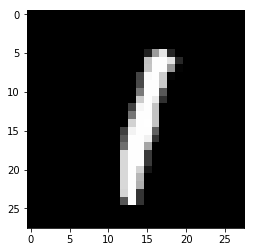

In [6]:
# print(dataset.train_set
for data in dataset.train_set:
    img, label, idx, angle = data
#     img, label, idx = data
#     img = np.expand_dims(img, 1)
#     img = Image.fromarray(img)
    print(img.shape, label, angle)
#     img = Image.fromarray(img)
#     img = np.transpose(img, (2, 3, 0, 1))
    img = np.squeeze(img)
#     print(img.shape)
    
    plt.imshow(img, cmap='gray')
    plt.show()
#     break
#     print(data)
    break

In [7]:
# Training the model
import os
import glob
import sys
sys.path.insert(1, './optim')
from tester import create_net

model_list = ["net0","net1","net2","net3","net4","net5","net6","net7"]
train = True
net_list = []
for model in model_list:
    net = create_net(model, d_dim, y_dim, z_dim, train=train)
    net_list.append(net)
# net_list = []
print(len(net_list))
net_list, idx_label_domain_output_train = tester.train(train_loader, net_list, train,
                    alpha_d, alpha_y, beta, betavar, d_dim, y_dim, z_dim, optimizer_name='adam', lr=lr,
                    n_epochs=n_epochs,lr_milestones=lr_milestones, batch_size=batch_size,
                    weight_decay=weight_decay,n_jobs_dataloader=n_jobs_dataloader)

8
beta = 0.00


/home/afarahani/.local/lib/python3.7/site-packages/torch/optim/lr_scheduler.py:82: UserWarning: Detected call of `lr_scheduler.step()` before `optimizer.step()`. In PyTorch 1.1.0 and later, you should call them in the opposite order: `optimizer.step()` before `lr_scheduler.step()`.  Failure to do this will result in PyTorch skipping the first value of the learning rate schedule.See more details at https://pytorch.org/docs/stable/optim.html#how-to-adjust-learning-rate
  "https://pytorch.org/docs/stable/optim.html#how-to-adjust-learning-rate", UserWarning)
/home/afarahani/.local/lib/python3.7/site-packages/torch/nn/_reduction.py:43: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


  Epoch 1/500  T: 6.17  Loss: 12321.9786   BCE:920.0663   KLD_zx:1472652.5000   KLD_zd:105.0682   KLD_zy:196.3360
beta = 0.01
  Epoch 2/500  T: 6.08  Loss: 6859.0610   BCE:681.4919   KLD_zx:331.0512   KLD_zd:107.3118   KLD_zy:307.7657
beta = 0.02
  Epoch 3/500  T: 6.09  Loss: 4952.3652   BCE:564.2525   KLD_zx:231.2613   KLD_zd:109.7779   KLD_zy:329.3353
beta = 0.03
  Epoch 4/500  T: 6.08  Loss: 4300.6264   BCE:460.4889   KLD_zx:219.7274   KLD_zd:117.7198   KLD_zy:305.8674
beta = 0.04
  Epoch 5/500  T: 6.08  Loss: 3872.9609   BCE:471.4765   KLD_zx:175.3368   KLD_zd:133.3504   KLD_zy:289.2132
beta = 0.05
  Epoch 6/500  T: 6.09  Loss: 3602.7678   BCE:396.6759   KLD_zx:165.2129   KLD_zd:140.2988   KLD_zy:270.4108
beta = 0.06
  Epoch 7/500  T: 6.09  Loss: 3385.6184   BCE:394.5718   KLD_zx:144.6668   KLD_zd:144.1110   KLD_zy:264.4090
beta = 0.07
  Epoch 8/500  T: 6.10  Loss: 3230.7896   BCE:352.3008   KLD_zx:135.6484   KLD_zd:144.6975   KLD_zy:249.7595
beta = 0.08
  Epoch 9/500  T: 6.11  Los

In [8]:
# Saving the trained model
from tester import create_net, get_latest_file, load_model_dict, save_model
from time import localtime

models_list = []
for i in range(len(net_list)):
    models_list.append("net"+str(i))
print(models_list)
path = "./log/"
model_name = "model_dict_train_"
save_model(net_list, path, model_name)

['net0', 'net1', 'net2', 'net3', 'net4', 'net5', 'net6', 'net7']
The model saved in: ./log/model_dict_train_014200.pt saved


In [9]:
# Load trained model for testing the test data
path = "./log/*"
file_name = "model_dict_train"
task = 'train_test'
net_list = tester.load_model_dict(path, file_name, d_dim, y_dim, z_dim, task, init_weights=False)

The most recent saved model's file:  ./log/model_dict_train_014200.pt
8
The most recent saved model's file:  ./log/model_dict_train_014200.pt
net0	 loaded
net1	 loaded
net2	 loaded
net3	 loaded
net4	 loaded
net5	 loaded
net6	 loaded
net7	 loaded


In [10]:
_, test_loader = dataset.loaders(batch_size=test_batch_size,shuffle_test=False,num_workers=n_jobs_dataloader)

In [11]:
#testing model if :
#train = True: test with the original trained model
idx_label_domain_output_test = tester.test(net_list, test_loader, d_dim, y_dim, z_dim,train=True)

Testing DIVA model...
Testing domain classification

Test set: Average loss: 0.0000, Domain Accuracy: 0.0/10000 (0%)

{"metric": "Eval - NLL Loss", "value": 0.0}
{"metric": "Eval - Accuracy", "value": 0.0}
Testing label classification

Test set: Average loss: 0.1521, Label Accuracy: 9539.0/10000 (95%)

{"metric": "Eval - NLL Loss", "value": 0.15210582733154296}
{"metric": "Eval - Accuracy", "value": 95.39}
DIVA model testing time: 3.152
Finished testing DIVA model. 



In [12]:
# Load trained model for fine training the model
init_weights=True
path = "./log/*"
file_name = "model_dict_train"
task = 'fine_train'
net_list = tester.load_model_dict(path, file_name, d_dim, y_dim, z_dim, task, init_weights)

The most recent saved model's file:  ./log/model_dict_train_014200.pt
8
The most recent saved model's file:  ./log/model_dict_init_test010058.pt
net0	loaded
net1	loaded
net2	loaded
net5	loaded
net5	loaded
net5	loaded
net6	loaded
net7	loaded


In [13]:
#fine tuning the reconstruction network for test case
lr = 0.0001
lr_milestones = (50, 100, 150)
n_epochs=300
net_test_list_fine_tune, idx_label_domain_output_fine_train = tester.train(train_loader, net_list, False,
                    alpha_d, alpha_y, beta, betavar, d_dim, y_dim, z_dim, optimizer_name='adam', lr=lr,
                    n_epochs=n_epochs,lr_milestones=lr_milestones, batch_size=batch_size,
                    weight_decay=weight_decay,n_jobs_dataloader=n_jobs_dataloader)


beta = 0.00
  Epoch 1/300  T: 16.29  BCE_x: 1422.6813   loss_d:6571.2195   loss_y:4543.5035
beta = 0.01
  Epoch 2/300  T: 16.30  BCE_x: 797.8234   loss_d:3696.9547   loss_y:2283.3144
beta = 0.02
  Epoch 3/300  T: 16.05  BCE_x: 728.1347   loss_d:3611.9010   loss_y:2177.5911
beta = 0.03
  Epoch 4/300  T: 16.23  BCE_x: 662.9870   loss_d:3574.8957   loss_y:2084.1768
beta = 0.04
  Epoch 5/300  T: 16.24  BCE_x: 632.0993   loss_d:3549.0965   loss_y:2037.2862
beta = 0.05
  Epoch 6/300  T: 16.23  BCE_x: 621.6531   loss_d:3528.9641   loss_y:1981.2524
beta = 0.06
  Epoch 7/300  T: 16.22  BCE_x: 590.8966   loss_d:3518.8352   loss_y:1946.6108
beta = 0.07
  Epoch 8/300  T: 16.47  BCE_x: 582.5284   loss_d:3511.4371   loss_y:1908.5877
beta = 0.08
  Epoch 9/300  T: 16.04  BCE_x: 569.9006   loss_d:3502.0450   loss_y:1882.7656
beta = 0.09
  Epoch 10/300  T: 16.21  BCE_x: 557.9108   loss_d:3494.4641   loss_y:1839.6140
beta = 0.10
  Epoch 11/300  T: 16.47  BCE_x: 545.4353   loss_d:3489.5794   loss_y:1810.9

### Saving the fine trained model

In [14]:
#saving the fine tuned models for test cases
path = "./log/"
if init_weights:
    model_name = "model_dict_init_test"
else:
    model_name = "model_dict_test"
save_model(net_test_list_fine_tune, path, model_name)

The model saved in: ./log/model_dict_init_test022648.pt saved


In [15]:
# Load fine trained model for testing the test data
init_weights = True
path = "./log/*"
file_name = "model_dict_test"
task = 'fine_train_test'
net_list = tester.load_model_dict(path, file_name, d_dim, y_dim, z_dim, task, init_weights)

The most recent saved model's file:  ./log/model_dict_test_011228.pt
6
The most recent saved model's file:  ./log/model_dict_init_test022648.pt
net0	 loaded
net1	 loaded
net2	 loaded
net3	 loaded
net4	 loaded
net5	 loaded
net6	 loaded
net7	 loaded


In [17]:
#testing model:
#train = False: test with the fine trained model
idx_label_domain_output_test = tester.test(net_list, test_loader, d_dim, y_dim, z_dim,train=False)

Testing DIVA model...
Testing domain classification

Test set: Average loss: 0.0000, Domain Accuracy: 0.0/10000 (0%)

{"metric": "Eval - NLL Loss", "value": 0.0}
{"metric": "Eval - Accuracy", "value": 0.0}
Testing label classification

Test set: Average loss: 0.6955, Label Accuracy: 7807.0/10000 (78%)

{"metric": "Eval - NLL Loss", "value": 0.6955059326171875}
{"metric": "Eval - Accuracy", "value": 78.07}
DIVA model testing time: 7.719
Finished testing DIVA model. 



In [17]:
#saving fine_trained data (idx,labels,domains,recon_xx,recon_dx,recon_yx,xzx,xzd,xzy)
import json
local_time = time.localtime(time.time())
f_name = str(local_time.tm_mday)+'-'+str(local_time.tm_hour)+'_'+str(local_time.tm_min)+'_'+str(local_time.tm_sec)

data_list_path = "./log/json/"
file_name = data_list_path + 'fine_trained_data_'+ f_name+'.txt'
print(file_name)
with open (file_name, 'w') as json_file:
    json.dump(idx_label_domain_output_fine_train, json_file)
    

./log/json/fine_trained_data_25-1_1_18.txt


In [17]:
#saving tested data when train=True(idx,labels,pred_y,domains,pred_d,recon_x,out_d,out_y,xzx,xzd,xzy)
#saving tested data when train=False(idx,labels,domains,recon_xx,recon_dx,recon_yx,xzx,xzd,xzy)
import json
local_time = time.localtime(time.time())
f_name = str(local_time.tm_mday)+'-'+str(local_time.tm_hour)+'_'+str(local_time.tm_min)+'_'+str(local_time.tm_sec)


data_list_path = "./log/json/"
if train:
    file_name = data_list_path + 'test_data_'+ f_name+'.txt'
else:
    file_name = data_list_path + 'fine_tested_data_'+ f_name+'.txt'
print(file_name)
with open (file_name, 'w') as json_file:
    json.dump(idx_label_domain_output_testx, json_file)
    

./log/json/fine_tested_data_12-1_12_51.txt


In [12]:
#loading json
import json
data_list_path = "./log/json/"
file_name = data_list_path+"fine_tested_data_12-1_12_51.txt"
with open (file_name, 'r') as json_file:
    idx_label_domain_output = json.load(json_file)

In [13]:
# Ploting the images from training
#training data = (idx,labels,domains,recon_img,xzx,xzd,xzy,dzd,yzy )
#fine_training_data = (idx,labels,domains,recon_xx,recon_dx,recon_yx,xzx,xzd,xzy)
local_time = time.localtime(time.time())
f_name = str(local_time.tm_mday)+'-'+str(local_time.tm_hour)+'_'+str(local_time.tm_min)+'_'+str(local_time.tm_sec)

fig = plt.figure(figsize = (20,40))
print(len(idx_label_domain_output_train))
for i, items in enumerate(idx_label_domain_output_train):  
    if i >= 20:
        break
    idx,l,d,out_x,out_d,out_y,xzx,xzd,xzy,dzd,yzy = items
    fig.add_subplot(10, 5, i+1)
    out_x = np.squeeze(out_x)
#     img2 = np.squeeze(img2)
#     img3 = np.squeeze(img3)
    plt.title("label="+str(l)+"  domain="+str(d))
    plt.imshow(out_x)
#     plt.imshow(img2)
#     plt.imshow(img3)
plt.savefig('./images/train_imgs_'+f_name+'.png')
plt.show()


NameError: name 'idx_label_domain_output_train' is not defined

<Figure size 1440x2880 with 0 Axes>

5000


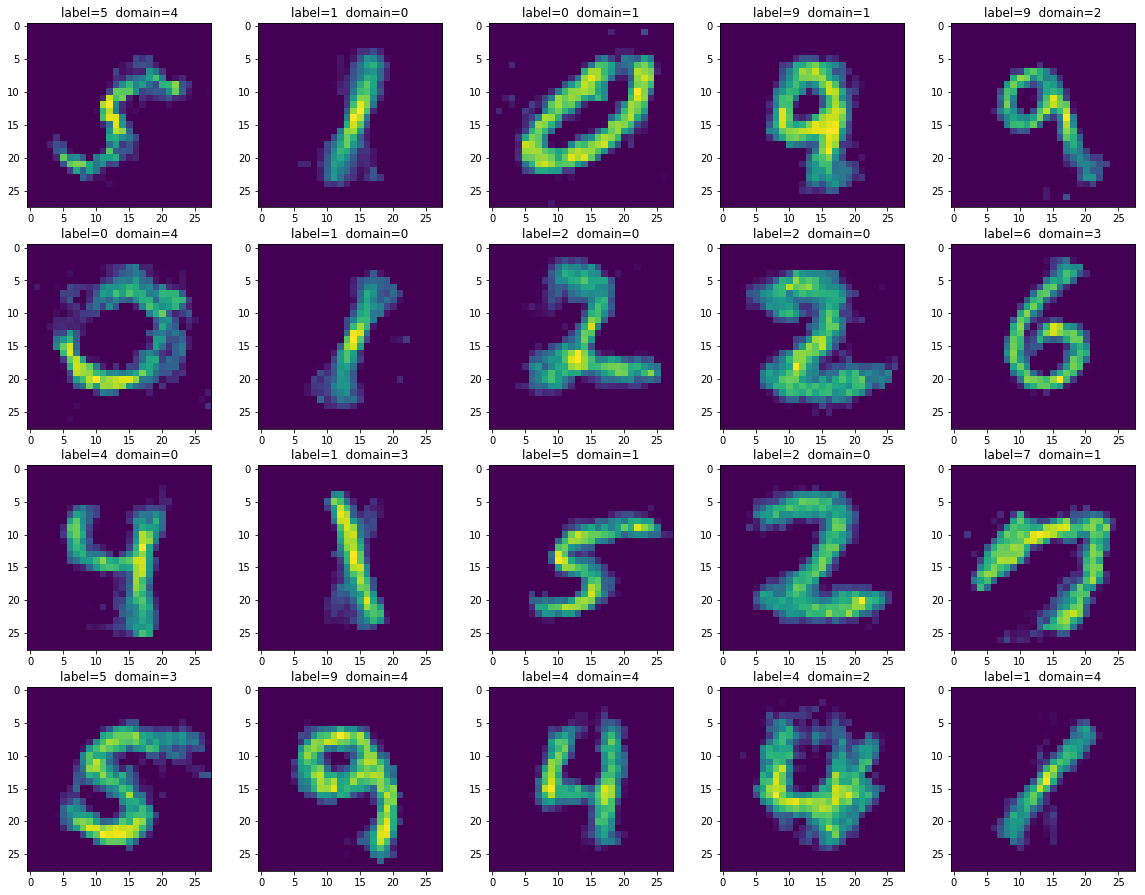

In [26]:
# Ploting the images from training
#training data = (idx,labels,domains,recon_img,xzx,xzd,xzy,dzd,yzy )
#fine_training_data = (idx,labels,domains,recon_xx,recon_dx,recon_yx,xzx,xzd,xzy)
local_time = time.localtime(time.time())
f_name = str(local_time.tm_mday)+'-'+str(local_time.tm_hour)+'_'+str(local_time.tm_min)+'_'+str(local_time.tm_sec)

fig = plt.figure(figsize = (20,40))
print(len(idx_label_domain_output_fine_train))
for i, items in enumerate(idx_label_domain_output_fine_train):  
    if i >= 20:
        break
    idx,l,d,img1,img2,img3,xzx,xzd,xzy = items
    fig.add_subplot(10, 5, i+1)
    img1 = np.squeeze(img1)
    img2 = np.squeeze(img2)
    img3 = np.squeeze(img3)
    plt.title("label="+str(l)+"  domain="+str(d))
#     plt.imshow(img1)
#     plt.imshow(img2)
    plt.imshow(img3)
plt.savefig('./images/fine_train_imgy_'+f_name+'.png')
plt.show()


In [ ]:
# Ploting the tested data, train=true means that ofter training we feed the test to trained model.
# train=False means that after fine tuning the model with separated reconstruction networks for x,d,y we feed the test data to the network
#when train=True(idx,labels,pred_y,domains,pred_d,recon_x,out_d,out_y,xzx,xzd,xzy)
#when train=False(idx,labels,domains,recon_xx,recon_dx,recon_yx,xzx,xzd,xzy)
local_time = time.localtime(time.time())
f_name = str(local_time.tm_mday)+'-'+str(local_time.tm_hour)+'_'+str(local_time.tm_min)+'_'+str(local_time.tm_sec)

fig = plt.figure(figsize = (20,40))
print(len(idx_label_domain_outxx_outdx_outyx))
for i, items in enumerate(idx_label_domain_outxx_outdx_outyx):  
    if i >= 20:
        break
    idx,l,d, img1,img2,img3 = items
    fig.add_subplot(10, 5, i+1)
    img1 = np.squeeze(img1)
    img2 = np.squeeze(img2)
    img3 = np.squeeze(img3)
    plt.title("label="+str(l)+"  domain="+str(d))
#     plt.imshow(img1)
#     plt.imshow(img2)
    plt.imshow(img3)
plt.savefig('./images/train_imgs_'+f_name+'.png')
plt.show()


In [ ]:
# Ploting the images from testing recunstruction
local_time = time.localtime(time.time())
f_name = str(local_time.tm_mday)+'-'+str(local_time.tm_hour)+'_'+str(local_time.tm_min)+'_'+str(local_time.tm_sec)

fig = plt.figure(figsize = (20,40))
print(len(idx_label_domain_output))
for i, items in enumerate(idx_label_domain_output):  
    if i >= 20:
        break
    idx,l,d, img1,img2,img3, zx,zd,zy = items
    fig.add_subplot(10, 5, i+1)
    img1 = np.squeeze(img1)
    img2 = np.squeeze(img2)
    img3 = np.squeeze(img3)
    plt.title("label="+str(l)+"  domain="+str(d))
#     plt.imshow(img1)
#     plt.imshow(img2)
    plt.imshow(img3)
# plt.savefig('./images/train_imgs_'+f_name+'.png')
plt.show()

In [ ]:
fig = plt.figure(figsize = (20,40))
for i, items in enumerate(idx_label_domain_output):
    idx,l,l_p, d,d_p, img = items
    if i >= 50:
        break
    fig.add_subplot(10, 5, i+1)
    img = np.squeeze(img)
    plt.title("label="+str(l)+"/"+str(l_p)+" domain="+str(d)+"/"+str(d_p))
    plt.imshow(img)
plt.savefig('./images/test_imgs'+f_name+'.png')
plt.show()


In [ ]:
# Reconstructed images for train data at last epoch
indices = []
labels = []
domains = []
recon_imgs = []
for items in idx_label_domain_output_train:
    idx, l, d, out = items
    indices.append(idx)
    labels.append(l)
    domains.append(d)
    recon_imgs.append(out)
indices_t, labels_t, domains_t, recon_imgs_t = np.array(indices), np.array(labels), np.array(domains), np.array(recon_imgs)

In [ ]:
# Reconstructed images in test
indices = []
labels = []
domains = []
recon_imgs = []
for items in idx_label_domain_output:
    idx, l, d, out = items
    indices.append(idx)
    labels.append(l)
    domains.append(d)
    recon_imgs.append(out)
indices, labels, domains, recon_imgs = np.array(indices), np.array(labels), np.array(domains), np.array(recon_imgs)

In [ ]:
# fig = plt.figure(figsize = (20,20))
# for i, items in enumerate(dataset.test_set):
#     idx,l,d, img = items
# #     if i > 10:
# #         break
#     fig.add_subplot(6, 6, i+1)
#     img = np.squeeze(img)
#     plt.title("label="+str(l)+"  domain="+str(d))
#     plt.imshow(img)
# plt.show()

In [30]:
# sellecting 500 samples from data in train
import random

mylist = random.sample(idx_label_domain_output_train, 1000)
imgx=[]
out_d=[]
out_y=[]
x_zx=[]
x_zy=[]
x_zd=[]
d_zd=[]
y_zy=[]
label = []
domain = []
for item in mylist:
    idx,l,d, outx,outd,outy, xzx,xzd,xzy,dzd,yzy = item
    imgx.append(outx)
    out_d.append(outd)
    out_y.append(outy)
    x_zx.append(xzx)
    x_zy.append(xzy)
    x_zd.append(xzd)
    d_zd.append(dzd)
    y_zy.append(yzy)
    label.append(l)
    domain.append(d)

In [31]:
imgx=np.array(imgx)
imgx=imgx.reshape(imgx.shape[0], -1)

In [32]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time

from sklearn import datasets, decomposition, manifold, preprocessing
from colorsys import hsv_to_rgb

import umap
reducers = [
    (manifold.TSNE, {"perplexity": 50}),
    # (manifold.LocallyLinearEmbedding, {'n_neighbors':10, 'method':'hessian'}),
#     (manifold.Isomap, {"n_neighbors": 30}),
#     (manifold.MDS, {}),
#     (decomposition.PCA, {}),
    (umap.UMAP, {"n_neighbors": 30, "min_dist": 0.3}),
]
test_data = [
    (x_zx, label),
    (x_zd, domain),
    (x_zy, label),
    (imgx,label),
    (out_d,domain),
    (out_y,label)
]

/home/afarahani/.local/lib/python3.7/site-packages/umap/spectral.py:229: UserWarning: Embedding a total of 8 separate connected components using meta-embedding (experimental)
  n_components
/home/afarahani/.local/lib/python3.7/site-packages/sklearn/manifold/spectral_embedding_.py:237: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"
/home/afarahani/.local/lib/python3.7/site-packages/umap/spectral.py:229: UserWarning: Embedding a total of 4 separate connected components using meta-embedding (experimental)
  n_components


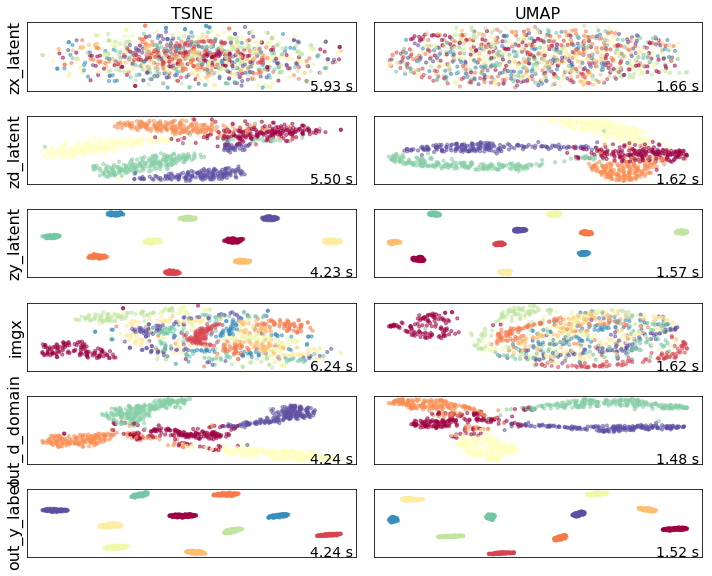

In [34]:
local_time = time.localtime(time.time())
f_name = str(local_time.tm_mday)+'-'+str(local_time.tm_hour)+'_'+str(local_time.tm_min)+'_'+str(local_time.tm_sec)

dataset_names = ["zx_latent", "zd_latent", "zy_latent", "imgx", "out_d_domain", "out_y_label"]

n_rows = len(test_data)
n_cols = len(reducers)
ax_index = 1
ax_list = []

# plt.figure(figsize=(9 * 2 + 3, 12.5))
plt.figure(figsize=(10, 8))
plt.subplots_adjust(
    left=.02, right=.98, bottom=.001, top=.96, wspace=.05, hspace=.01
)
for data, labels in test_data:
    for reducer, args in reducers:
        start_time = time.time()
        embedding = reducer(n_components=2, **args).fit_transform(data)
        elapsed_time = time.time() - start_time
        ax = plt.subplot(n_rows, n_cols, ax_index)
        if isinstance(labels[0], tuple):
            ax.scatter(*embedding.T, s=10, c=labels, alpha=0.5)
        else:
            ax.scatter(
                *embedding.T, s=10, c=labels, cmap="Spectral", alpha=0.5
            )
        ax.text(
            0.99,
            0.01,
            "{:.2f} s".format(elapsed_time),
            transform=ax.transAxes,
            size=14,
            horizontalalignment="right",
        )
        ax_list.append(ax)
        ax_index += 1
plt.setp(ax_list, xticks=[], yticks=[])

for i in np.arange(n_rows) * n_cols:
    ax_list[i].set_ylabel(dataset_names[i // n_cols], size=16)
for i in range(n_cols):
    ax_list[i].set_xlabel(repr(reducers[i][0]()).split("(")[0], size=16)
    ax_list[i].xaxis.set_label_position("top")
# plt.title("label="+str(l)+"  domain="+str(d))
plt.savefig('./log/plots/visualization_train_'+f_name+'.png')
plt.tight_layout()



In [35]:
# sellecting 500 samples from data in fine train
import random

mylist = random.sample(idx_label_domain_output_fine_train, 1000)
imgx=[]
imgd=[]
imgy=[]
zx=[]
zy=[]
zd=[]
label = []
domain = []
for item in mylist:
    idx,l,d, img1,img2,img3, zx_dim,zd_dim,zy_dim = item
    imgx.append(img1)
    imgd.append(img2)
    imgy.append(img3)
    zx.append(zx_dim)
    zy.append(zy_dim)
    zd.append(zd_dim)
    label.append(l)
    domain.append(d)

In [36]:
imgx=np.array(imgx)
imgx=imgx.reshape(imgx.shape[0], -1)
imgd=np.array(imgd)
imgd=imgd.reshape(imgd.shape[0], -1)
imgy=np.array(imgy)
imgy=imgy.reshape(imgy.shape[0], -1)

In [37]:
print(imgx.shape, imgd.shape, imgy.shape)

(1000, 784) (1000, 784) (1000, 784)


In [38]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time

from sklearn import datasets, decomposition, manifold, preprocessing
from colorsys import hsv_to_rgb

import umap
reducers = [
    (manifold.TSNE, {"perplexity": 50}),
    # (manifold.LocallyLinearEmbedding, {'n_neighbors':10, 'method':'hessian'}),
#     (manifold.Isomap, {"n_neighbors": 30}),
#     (manifold.MDS, {}),
#     (decomposition.PCA, {}),
    (umap.UMAP, {"n_neighbors": 30, "min_dist": 0.3}),
]
test_data = [
    (zx, label),
    (zd, domain),
    (zy, label),
    (imgx,label),
    (imgd,domain),
    (imgy,label)
]

/home/afarahani/.local/lib/python3.7/site-packages/umap/spectral.py:229: UserWarning: Embedding a total of 9 separate connected components using meta-embedding (experimental)
  n_components
/home/afarahani/.local/lib/python3.7/site-packages/sklearn/manifold/spectral_embedding_.py:237: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"


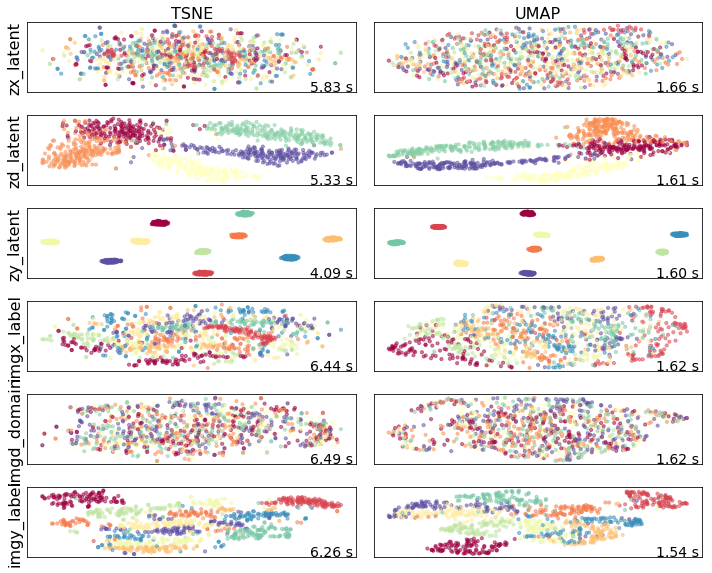

In [39]:
local_time = time.localtime(time.time())
f_name = str(local_time.tm_mday)+'-'+str(local_time.tm_hour)+'_'+str(local_time.tm_min)+'_'+str(local_time.tm_sec)

dataset_names = ["zx_latent", "zd_latent", "zy_latent", "imgx_label", "imgd_domain", "imgy_label"]

n_rows = len(test_data)
n_cols = len(reducers)
ax_index = 1
ax_list = []

# plt.figure(figsize=(9 * 2 + 3, 12.5))
plt.figure(figsize=(10, 8))
plt.subplots_adjust(
    left=.02, right=.98, bottom=.001, top=.96, wspace=.05, hspace=.01
)
for data, labels in test_data:
    for reducer, args in reducers:
        start_time = time.time()
        embedding = reducer(n_components=2, **args).fit_transform(data)
        elapsed_time = time.time() - start_time
        ax = plt.subplot(n_rows, n_cols, ax_index)
        if isinstance(labels[0], tuple):
            ax.scatter(*embedding.T, s=10, c=labels, alpha=0.5)
        else:
            ax.scatter(
                *embedding.T, s=10, c=labels, cmap="Spectral", alpha=0.5
            )
        ax.text(
            0.99,
            0.01,
            "{:.2f} s".format(elapsed_time),
            transform=ax.transAxes,
            size=14,
            horizontalalignment="right",
        )
        ax_list.append(ax)
        ax_index += 1
plt.setp(ax_list, xticks=[], yticks=[])

for i in np.arange(n_rows) * n_cols:
    ax_list[i].set_ylabel(dataset_names[i // n_cols], size=16)
for i in range(n_cols):
    ax_list[i].set_xlabel(repr(reducers[i][0]()).split("(")[0], size=16)
    ax_list[i].xaxis.set_label_position("top")
# plt.title("label="+str(l)+"  domain="+str(d))
plt.savefig('./log/plots/visualization_fine_train'+f_name+'.png')
plt.tight_layout()



In [47]:
# sellecting 500 samples from data in org test
import random

mylist = random.sample(idx_label_domain_output_test, 1000)
imgx=[]
imgd=[]
imgy=[]
zx=[]
zy=[]
zd=[]
label = []
domain = []
for item in mylist:
    idx,l,p_l, d,p_d, img1,img2,img3, zx_dim,zd_dim,zy_dim = item
    imgx.append(img1)
    imgd.append(img2)
    imgy.append(img3)
    zx.append(zx_dim)
    zy.append(zy_dim)
    zd.append(zd_dim)
    label.append(l)
    domain.append(d)

In [48]:
imgx=np.array(imgx)
imgx=imgx.reshape(imgx.shape[0], -1)
imgd=np.array(imgd)
imgd=imgd.reshape(imgd.shape[0], -1)
imgy=np.array(imgy)
imgy=imgy.reshape(imgy.shape[0], -1)

In [49]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time

from sklearn import datasets, decomposition, manifold, preprocessing
from colorsys import hsv_to_rgb

import umap
reducers = [
    (manifold.TSNE, {"perplexity": 50}),
    # (manifold.LocallyLinearEmbedding, {'n_neighbors':10, 'method':'hessian'}),
#     (manifold.Isomap, {"n_neighbors": 30}),
#     (manifold.MDS, {}),
#     (decomposition.PCA, {}),
    (umap.UMAP, {"n_neighbors": 30, "min_dist": 0.3}),
]
test_data = [
    (zx, label),
    (zd, domain),
    (zy, label),
    (imgx,label),
    (imgd,domain),
    (imgy,label)
]

/home/afarahani/.local/lib/python3.7/site-packages/umap/spectral.py:229: UserWarning: Embedding a total of 3 separate connected components using meta-embedding (experimental)
  n_components
/home/afarahani/.local/lib/python3.7/site-packages/umap/spectral.py:229: UserWarning: Embedding a total of 3 separate connected components using meta-embedding (experimental)
  n_components


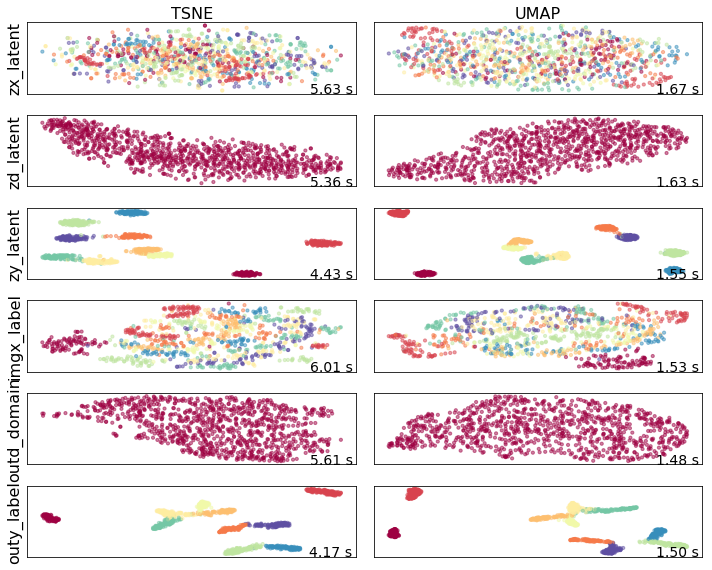

In [50]:
#org test
local_time = time.localtime(time.time())
f_name = str(local_time.tm_mday)+'-'+str(local_time.tm_hour)+'_'+str(local_time.tm_min)+'_'+str(local_time.tm_sec)

dataset_names = ["zx_latent", "zd_latent", "zy_latent", "imgx_label", "outd_domain", "outy_label"]

n_rows = len(test_data)
n_cols = len(reducers)
ax_index = 1
ax_list = []

# plt.figure(figsize=(9 * 2 + 3, 12.5))
plt.figure(figsize=(10, 8))
plt.subplots_adjust(
    left=.02, right=.98, bottom=.001, top=.96, wspace=.05, hspace=.01
)
for data, labels in test_data:
    for reducer, args in reducers:
        start_time = time.time()
        embedding = reducer(n_components=2, **args).fit_transform(data)
        elapsed_time = time.time() - start_time
        ax = plt.subplot(n_rows, n_cols, ax_index)
        if isinstance(labels[0], tuple):
            ax.scatter(*embedding.T, s=10, c=labels, alpha=0.5)
        else:
            ax.scatter(
                *embedding.T, s=10, c=labels, cmap="Spectral", alpha=0.5
            )
        ax.text(
            0.99,
            0.01,
            "{:.2f} s".format(elapsed_time),
            transform=ax.transAxes,
            size=14,
            horizontalalignment="right",
        )
        ax_list.append(ax)
        ax_index += 1
plt.setp(ax_list, xticks=[], yticks=[])

for i in np.arange(n_rows) * n_cols:
    ax_list[i].set_ylabel(dataset_names[i // n_cols], size=16)
for i in range(n_cols):
    ax_list[i].set_xlabel(repr(reducers[i][0]()).split("(")[0], size=16)
    ax_list[i].xaxis.set_label_position("top")
# plt.title("label="+str(l)+"  domain="+str(d))
plt.savefig('./log/plots/visualization_test_'+f_name+'.png')
plt.tight_layout()



In [42]:
# sellecting 500 samples from data in fine test
import random

mylist = random.sample(idx_label_domain_output_fine_test, 1000)
imgx=[]
imgd=[]
imgy=[]
zx=[]
zy=[]
zd=[]
label = []
domain = []
for item in mylist:
    idx,l,d, img1,img2,img3, zx_dim,zd_dim,zy_dim = item
    imgx.append(img1)
    imgd.append(img2)
    imgy.append(img3)
    zx.append(zx_dim)
    zy.append(zy_dim)
    zd.append(zd_dim)
    label.append(l)
    domain.append(d)

In [43]:
imgx=np.array(imgx)
imgx=imgx.reshape(imgx.shape[0], -1)
imgd=np.array(imgd)
imgd=imgd.reshape(imgd.shape[0], -1)
imgy=np.array(imgy)
imgy=imgy.reshape(imgy.shape[0], -1)

In [44]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time

from sklearn import datasets, decomposition, manifold, preprocessing
from colorsys import hsv_to_rgb

import umap
reducers = [
    (manifold.TSNE, {"perplexity": 50}),
    # (manifold.LocallyLinearEmbedding, {'n_neighbors':10, 'method':'hessian'}),
#     (manifold.Isomap, {"n_neighbors": 30}),
#     (manifold.MDS, {}),
#     (decomposition.PCA, {}),
    (umap.UMAP, {"n_neighbors": 30, "min_dist": 0.3}),
]
test_data = [
    (zx, label),
    (zd, domain),
    (zy, label),
    (imgx,label),
    (imgd,domain),
    (imgy,label)
]

/home/afarahani/.local/lib/python3.7/site-packages/umap/spectral.py:229: UserWarning: Embedding a total of 3 separate connected components using meta-embedding (experimental)
  n_components


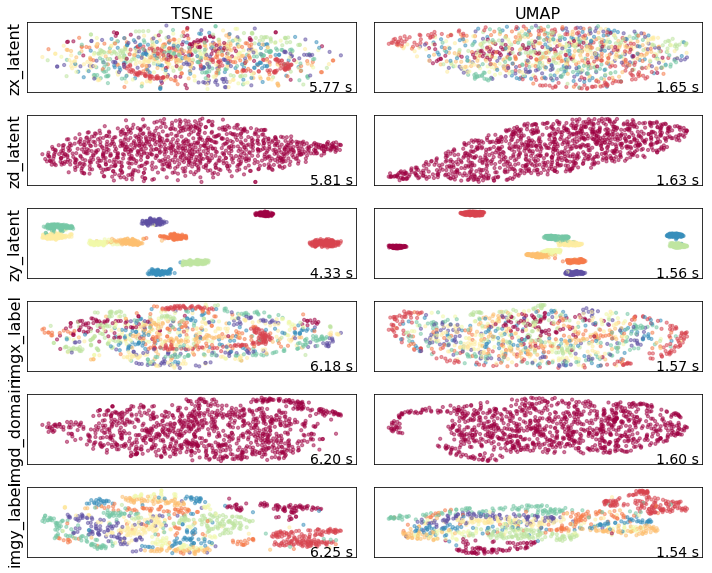

In [45]:
#fine test
local_time = time.localtime(time.time())
f_name = str(local_time.tm_mday)+'-'+str(local_time.tm_hour)+'_'+str(local_time.tm_min)+'_'+str(local_time.tm_sec)

dataset_names = ["zx_latent", "zd_latent", "zy_latent", "imgx_label", "imgd_domain", "imgy_label"]

n_rows = len(test_data)
n_cols = len(reducers)
ax_index = 1
ax_list = []

# plt.figure(figsize=(9 * 2 + 3, 12.5))
plt.figure(figsize=(10, 8))
plt.subplots_adjust(
    left=.02, right=.98, bottom=.001, top=.96, wspace=.05, hspace=.01
)
for data, labels in test_data:
    for reducer, args in reducers:
        start_time = time.time()
        embedding = reducer(n_components=2, **args).fit_transform(data)
        elapsed_time = time.time() - start_time
        ax = plt.subplot(n_rows, n_cols, ax_index)
        if isinstance(labels[0], tuple):
            ax.scatter(*embedding.T, s=10, c=labels, alpha=0.5)
        else:
            ax.scatter(
                *embedding.T, s=10, c=labels, cmap="Spectral", alpha=0.5
            )
        ax.text(
            0.99,
            0.01,
            "{:.2f} s".format(elapsed_time),
            transform=ax.transAxes,
            size=14,
            horizontalalignment="right",
        )
        ax_list.append(ax)
        ax_index += 1
plt.setp(ax_list, xticks=[], yticks=[])

for i in np.arange(n_rows) * n_cols:
    ax_list[i].set_ylabel(dataset_names[i // n_cols], size=16)
for i in range(n_cols):
    ax_list[i].set_xlabel(repr(reducers[i][0]()).split("(")[0], size=16)
    ax_list[i].xaxis.set_label_position("top")
# plt.title("label="+str(l)+"  domain="+str(d))
plt.savefig('./log/plots/visualization_fine_test_'+f_name+'.png')
plt.tight_layout()

